In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
file_path = "Crime_Data_from_2020_to_Present.csv"
data = pd.read_csv("C:\\Users\\SHAFINA JALEEL\\OneDrive\\Desktop\\THANZEER\\Project\\New folder\\Crime_Data_from_2020_to_Present.csv")
print("Dataset Info:")
print(data.info())
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10087 entries, 0 to 10086
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           10087 non-null  int64  
 1   Date Rptd       10087 non-null  object 
 2   DATE OCC        10087 non-null  object 
 3   TIME OCC        10087 non-null  int64  
 4   AREA            10087 non-null  int64  
 5   AREA NAME       10087 non-null  object 
 6   Rpt Dist No     10087 non-null  int64  
 7   Part 1-2        10087 non-null  int64  
 8   Crm Cd          10087 non-null  int64  
 9   Crm Cd Desc     10087 non-null  object 
 10  Mocodes         8705 non-null   object 
 11  Vict Age        10087 non-null  int64  
 12  Vict Sex        8753 non-null   object 
 13  Vict Descent    8751 non-null   object 
 14  Premis Cd       10087 non-null  int64  
 15  Premis Desc     10079 non-null  object 
 16  Weapon Used Cd  3804 non-null   float64
 17  Weapon Desc     3

In [23]:
print("Columns in dataset:", data.columns)
if 'Date Rptd' in data.columns:
    data.rename(columns={'Date Rptd': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = pd.to_datetime(data['TIME OCC'], format='%H%M', errors='coerce').dt.hour
data = data.ffill()
data.dropna(subset=['LAT', 'LON'], inplace=True)


Columns in dataset: Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


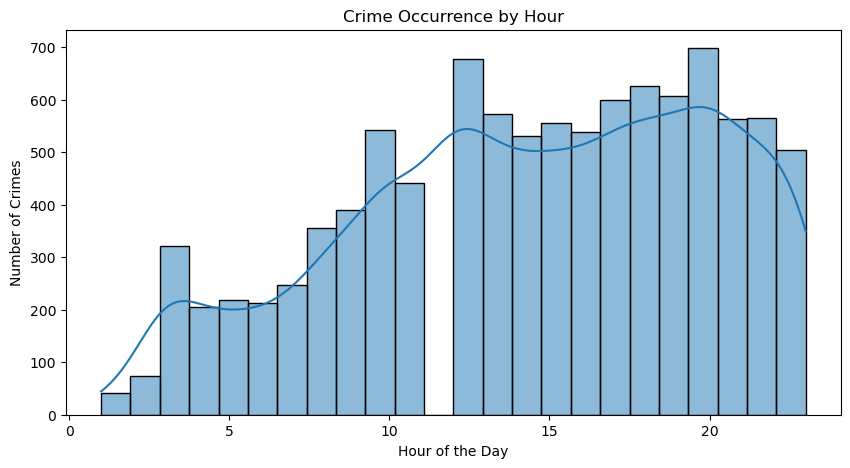

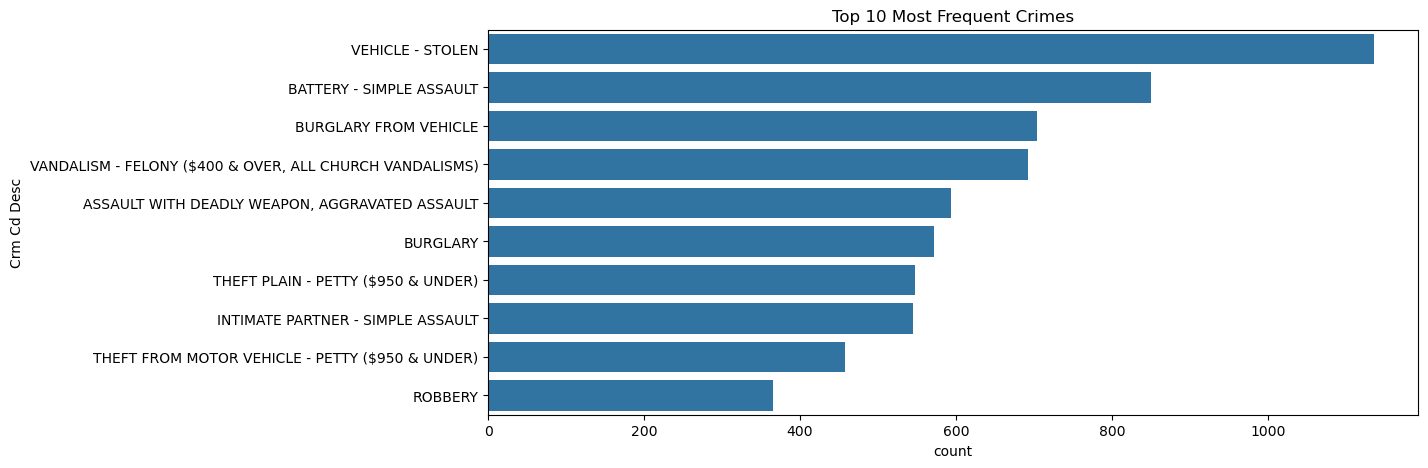

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Hour'], bins=24, kde=True)
plt.title("Crime Occurrence by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.show()
plt.figure(figsize=(12, 5))
sns.countplot(y=data['Crm Cd Desc'], order=data['Crm Cd Desc'].value_counts().index[:10])
plt.title("Top 10 Most Frequent Crimes")
plt.show()


In [27]:
features = ['LAT', 'LON', 'Hour', 'Month', 'Day']
target = 'Crm Cd'  
data = data.dropna(subset=[target])
data[target] = data[target].astype(int)
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)


Training Set Shape: (8069, 5)
Test Set Shape: (2018, 5)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

In [19]:
# Predict the probability of high-risk crime areas
X_test['Crime Risk'] = model.predict_proba(X_test).max(axis=1)

# High-Risk Locations (Top 10)
high_risk = X_test.sort_values(by='Crime Risk', ascending=False).head(10)
print("Top 10 High-Risk Crime Locations:\n", high_risk)


Top 10 High-Risk Crime Locations:
           LAT       LON  Hour  Month  Day  Crime Risk
4568  34.0450 -118.2640  22.0      2    2        0.74
2943  34.0145 -118.2937  17.0      6   10        0.73
5354  34.0397 -118.2637  18.0      1    9        0.68
1208  34.0484 -118.4437  22.0     10    3        0.68
3397  34.0507 -118.2643  23.0     11   11        0.67
31    34.0529 -118.2819  20.0     12   11        0.67
2110  33.9892 -118.3045  12.0      8   11        0.63
2707  34.1032 -118.3348  17.0      9    4        0.63
8049  34.0706 -118.3674  20.0      2    2        0.62
4504  34.0363 -118.2919  21.0      1    4        0.58
